In [1]:
from mxnet import gluon
import mxnet as mx
from mxnet import nd
from mxnet.gluon import nn 
import numpy as np
from tqdm import tqdm

/home/jiancheng/anaconda3/lib/python3.6/site-packages/urllib3/contrib/pyopenssl.py:46: DeprecationWarning: OpenSSL.rand is deprecated - you should use os.urandom instead
  import OpenSSL.SSL


In [3]:
from mylib.deeplabv3p import DeepLabv3p

In [41]:
model = DeepLabv3p(OS=8)

In [42]:
model.collect_params()

deeplabv3p3_ (
  Parameter entry_flow_conv1_1_weight (shape=(32, 0, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_gamma (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_beta (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_mean (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_var (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_weight (shape=(64, 0, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_gamma (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_beta (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_mean (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_var (shape=(0,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_block1_separable_conv1_depthwise_weight (shape=(64, 1, 3, 3), dtype=<class 'numpy.fl

In [44]:
# weights = '/home/jiancheng/code/segmentation/deeplabv3p_gluon/tmp_weights/pascal_train_aug/pascal_train_aug.params'
weights = "/home/jiancheng/code/segmentation/deeplabv3p_gluon/tmp_weights/pascal_trainval/pascal_trainval.params"

model.load_params(filename=weights,ctx=mx.gpu())

In [45]:
model.collect_params()

deeplabv3p3_ (
  Parameter entry_flow_conv1_1_weight (shape=(32, 3, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_gamma (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_beta (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_mean (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_1_BN_running_var (shape=(32,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_weight (shape=(64, 32, 3, 3), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_gamma (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_beta (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_mean (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_conv1_2_BN_running_var (shape=(64,), dtype=<class 'numpy.float32'>)
  Parameter entry_flow_block1_separable_conv1_depthwise_weight (shape=(64, 1, 3, 3), dtype=<class 

In [46]:
from matplotlib import pyplot as plt
import PIL.Image
import numpy as np
# import keras
# from model import Deeplabv3

%matplotlib inline

In [47]:
img = PIL.Image.open("../../keras-deeplab-v3-plus/imgs/image1.jpg")

In [48]:
x = (np.array(img.resize((512,512),resample=2)) / 127.5 - 1)

In [49]:
x.shape

(512, 512, 3)

In [50]:
inputs = nd.array(np.expand_dims(x.transpose(2,0,1),0),ctx=mx.gpu())

In [51]:
inputs.shape

(1, 3, 512, 512)

In [52]:
inputs.sum()


[-37801.125]
<NDArray 1 @gpu(0)>

In [53]:
res = model(inputs)

In [54]:
res.shape

(1, 21, 512, 512)

In [55]:
res.asnumpy()

array([[[[ 15.40815544,  15.95414829,  16.50014114, ...,  19.39253044,
           18.28520012,  17.17790413],
         [ 15.90045166,  16.3976326 ,  16.89481354, ...,  19.66383171,
           18.66220474,  17.66060829],
         [ 16.39274788,  16.84111786,  17.28948784, ...,  19.93513107,
           19.03920937,  18.14331436],
         ..., 
         [ 17.85703659,  18.53351784,  19.21000099, ...,  17.34604263,
           16.82728004,  16.30853462],
         [ 17.45733833,  18.1656208 ,  18.87390327, ...,  17.05588341,
           16.49787331,  15.93988228],
         [ 17.05765533,  17.79773331,  18.53781319, ...,  16.7657299 ,
           16.1684761 ,  15.57124233]],

        [[  1.84503353,   1.94872797,   2.05242252, ...,   3.20329905,
            3.39073825,   3.57817173],
         [  2.00709462,   2.0694294 ,   2.13176394, ...,   3.03564453,
            3.23610735,   3.43656421],
         [  2.16915584,   2.19013071,   2.21110535, ...,   2.86798978,
            3.08147645,   3.2949

In [56]:
labels = np.argmax(res.asnumpy().squeeze(),0)

In [57]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ..., 
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

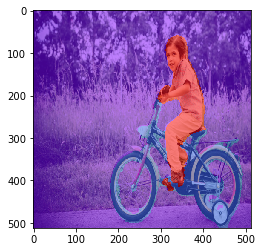

In [58]:
plt.imshow(((x+1)*127.5).astype(np.uint8))
plt.imshow(labels*20,alpha=.5,cmap=plt.cm.rainbow)